In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras import backend as K

import warnings
warnings.filterwarnings("ignore")

In [23]:
iris = load_iris()
# x = iris.data
# y = iris.target

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

df['species'] = df['target'].apply(lambda x: iris.target_names[x])

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

In [26]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [30]:
colors = ['#7E57C2', '#4DB6AC', '#303F9F']
palette = dict(zip(iris.target_names, colors))

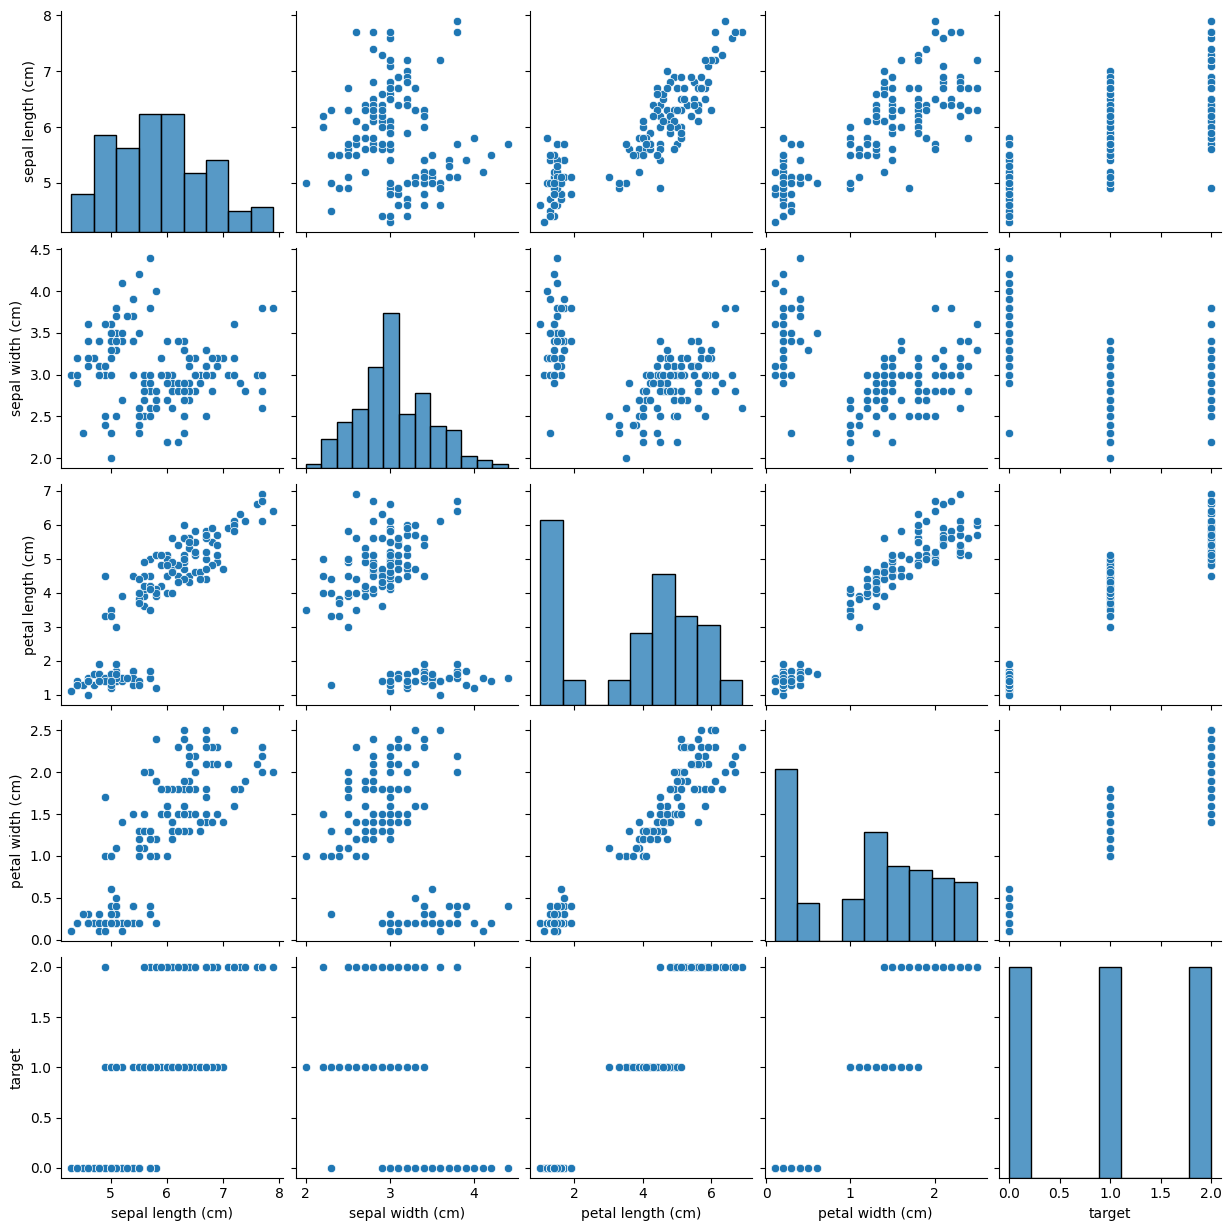

In [40]:
sns.pairplot(df);

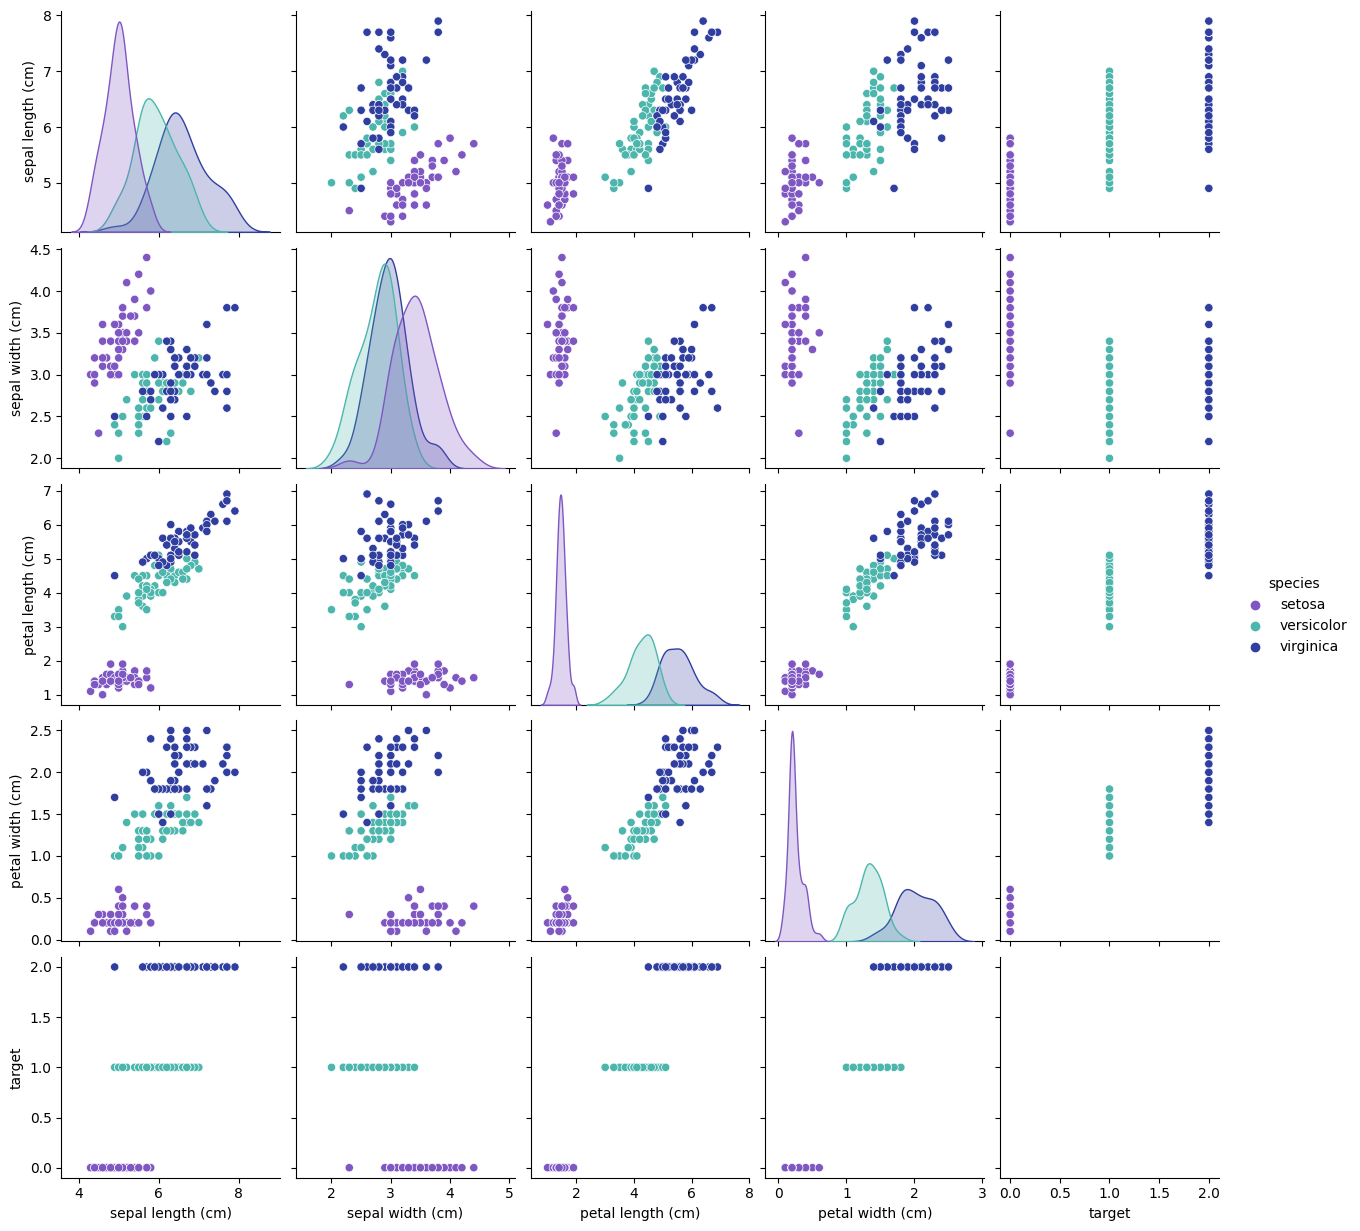

In [61]:
sns.pairplot(df, hue='species', palette=palette);

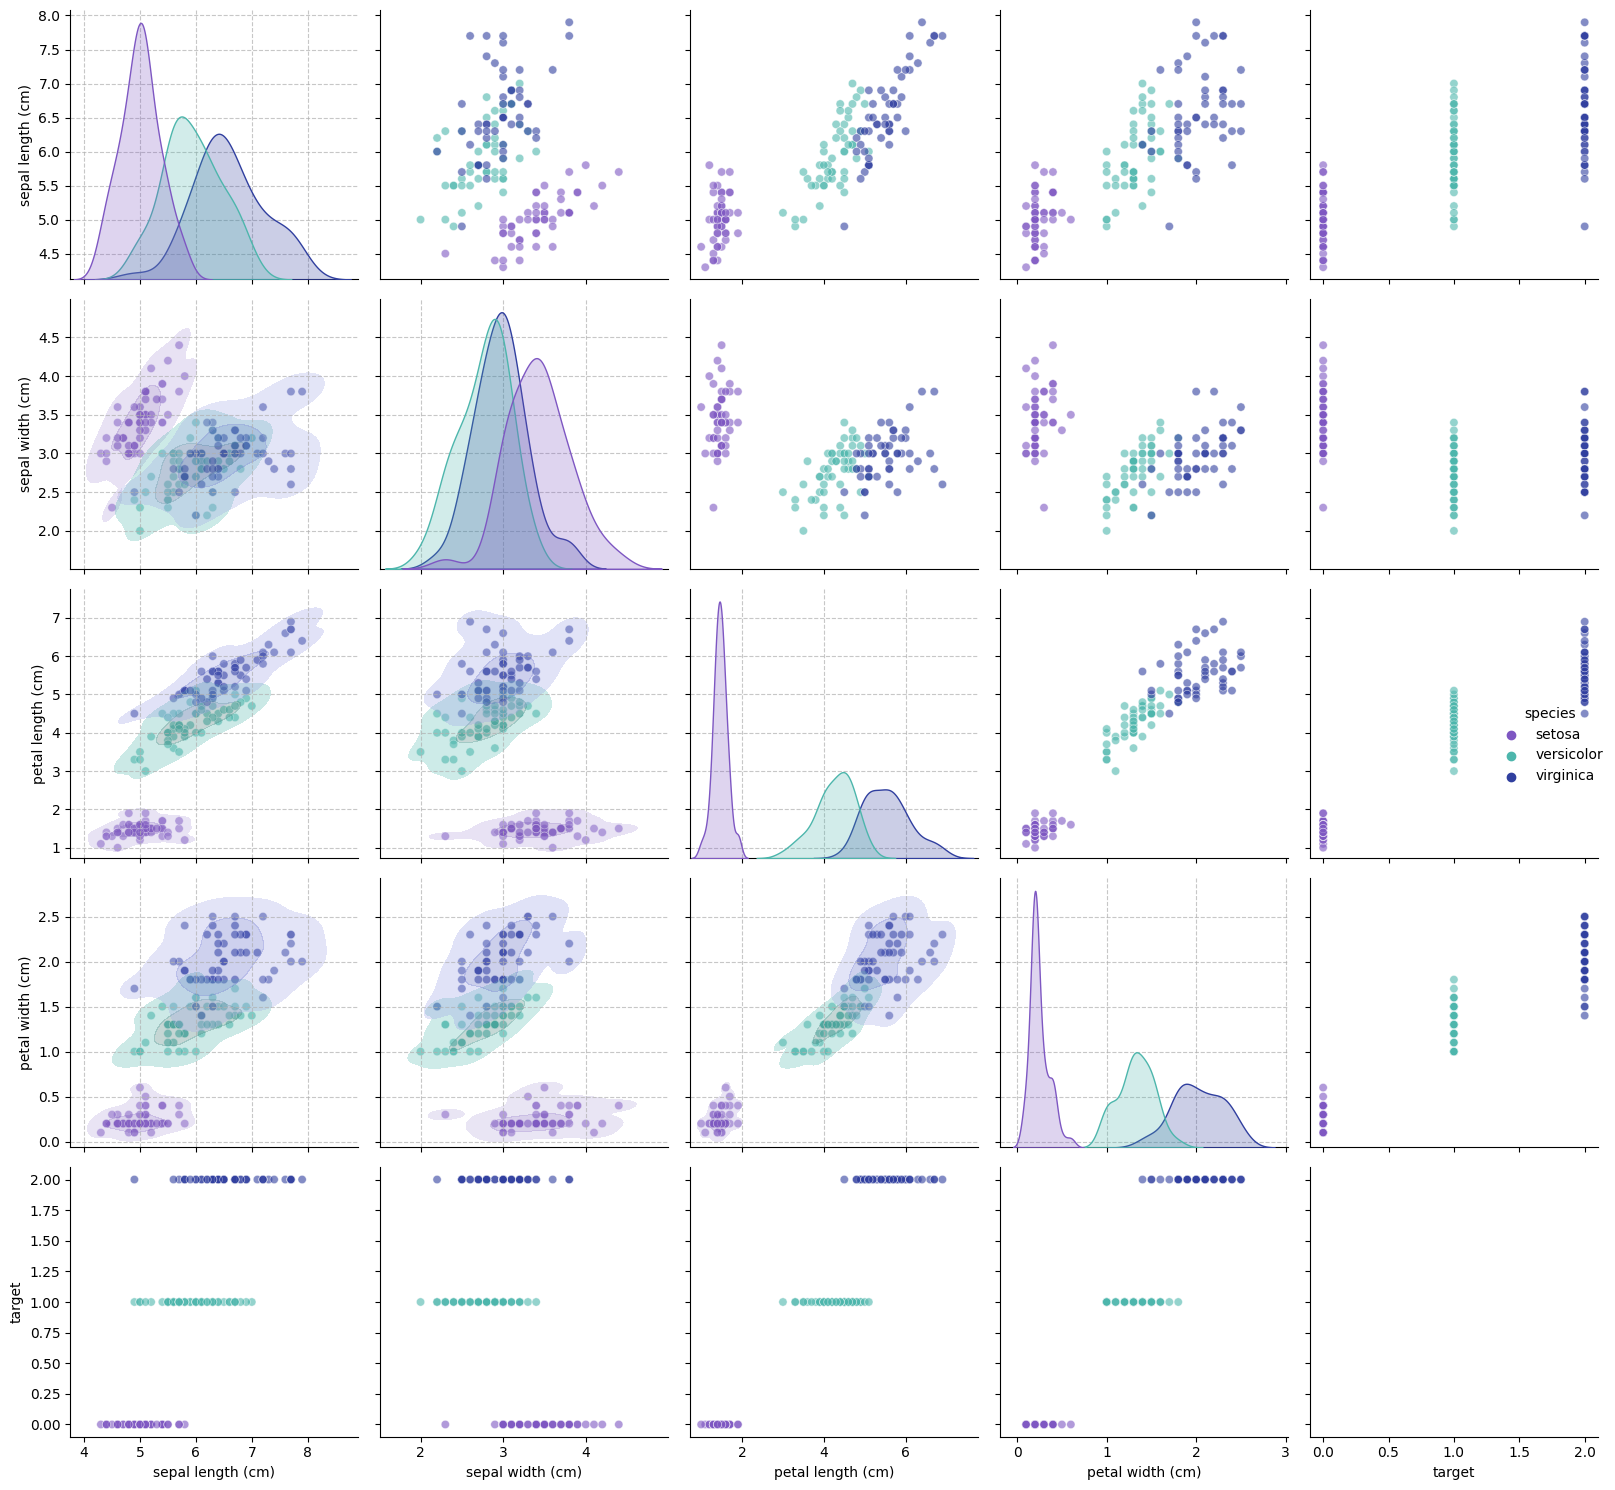

In [42]:
g = sns.pairplot(
    data=df,
    hue='species',
    # corner=True,
    height=3,
    diag_kind='kde',
    palette=palette,
    plot_kws={'alpha': 0.6}
)

for i in range(len(df.columns)-2):
    for j in range(len(df.columns)-2):
        if i > j:
            ax = g.axes[i, j]
            ax.grid(True, linestyle='--', alpha=0.7)
            for idx, target in enumerate(df['species'].unique()):
                subset = df[df['species'] == target]
                sns.kdeplot(
                    data=subset,
                    x=df.columns[j],
                    y=df.columns[i],
                    ax=ax,
                    levels=3,
                    alpha=0.3,
                    fill=True,
                    color=colors[idx]
                )

        if i == j and i < len(df.columns)-2:
            g.axes[i, i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

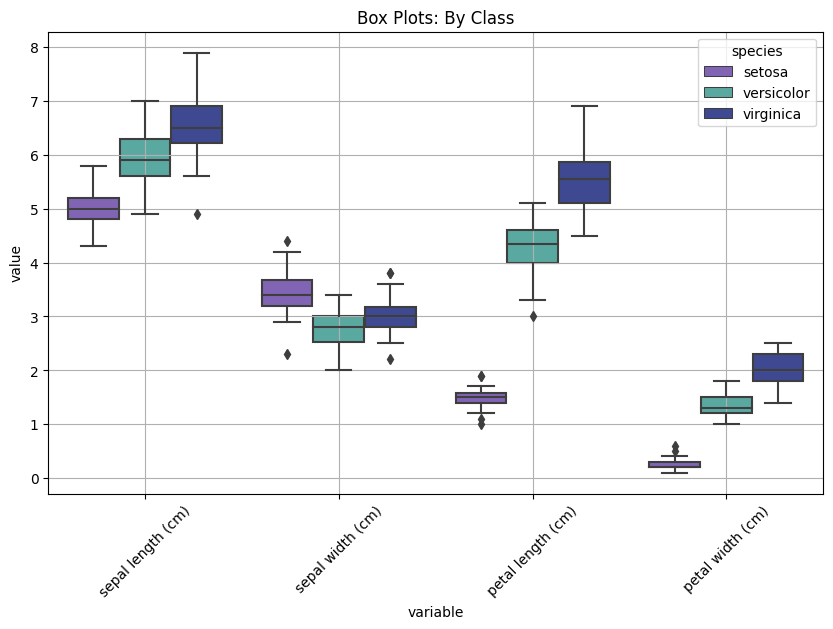

In [44]:
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['species'], value_vars=iris.feature_names)
sns.boxplot(x='variable', y='value', data=df_melted, hue='species', palette=palette)
plt.title('Box Plots: By Class')
plt.xticks(rotation=45)
plt.grid()
plt.show()

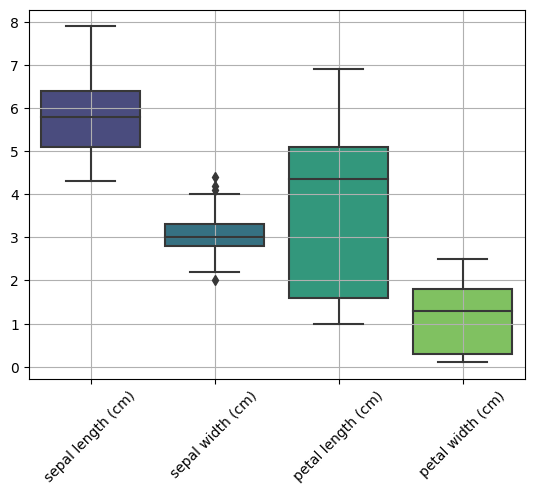

In [48]:
sns.boxplot(data=df.iloc[:, :4], palette='viridis')
plt.xticks(rotation=45)
plt.grid()
plt.show()

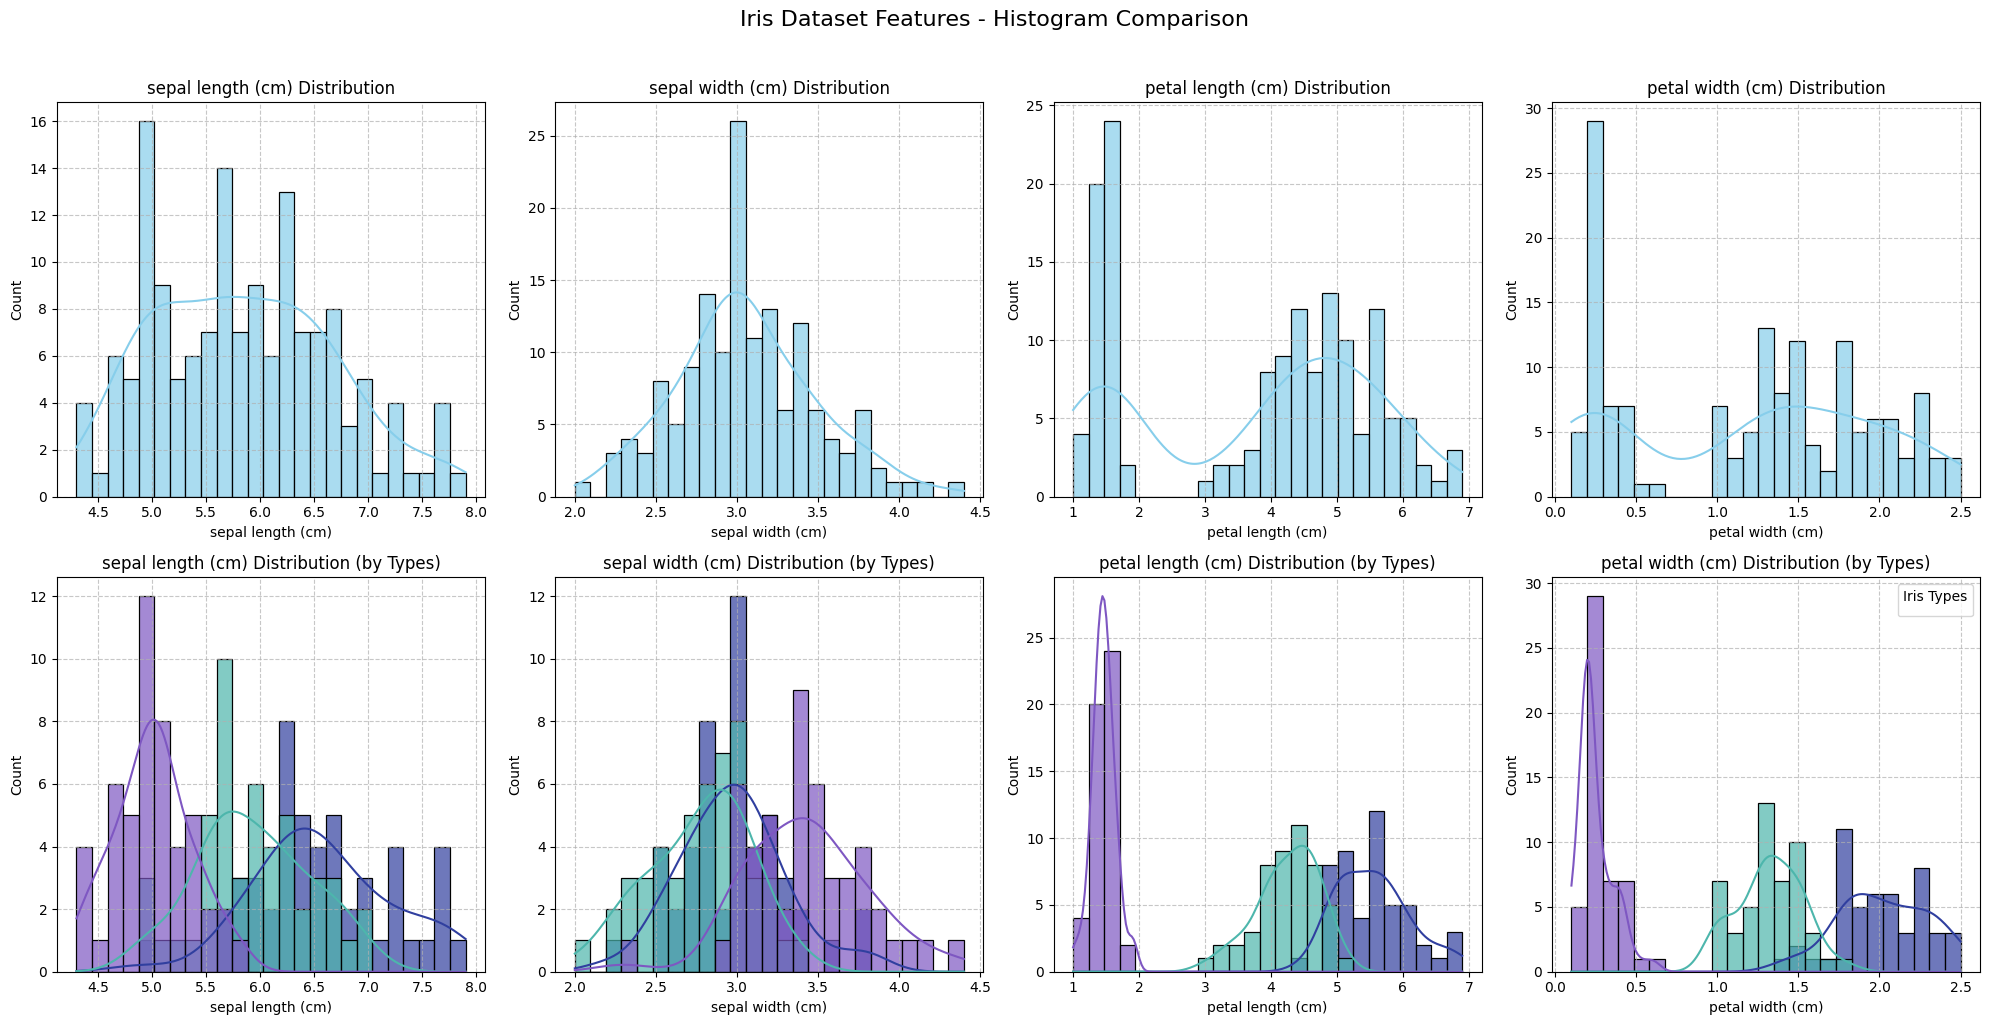

In [51]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Iris Dataset Features - Histogram Comparison', size=16, y=1.02)

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        bins=25,
        ax=axes[0, idx],
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    axes[0, idx].grid(True, linestyle='--', alpha=0.7)
    axes[0, idx].set_title(f'{feature} Distribution')

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        hue='species',
        bins=25,
        ax=axes[1, idx],
        palette=palette,
        alpha=0.7,
        multiple="layer"
    )
    axes[1, idx].grid(True, linestyle='--', alpha=0.7)
    axes[1, idx].set_title(f'{feature} Distribution (by Types)')
    if idx == 3:
        axes[1, idx].legend(title='Iris Types')
    else:
        axes[1, idx].get_legend().remove()

plt.tight_layout()
plt.show()

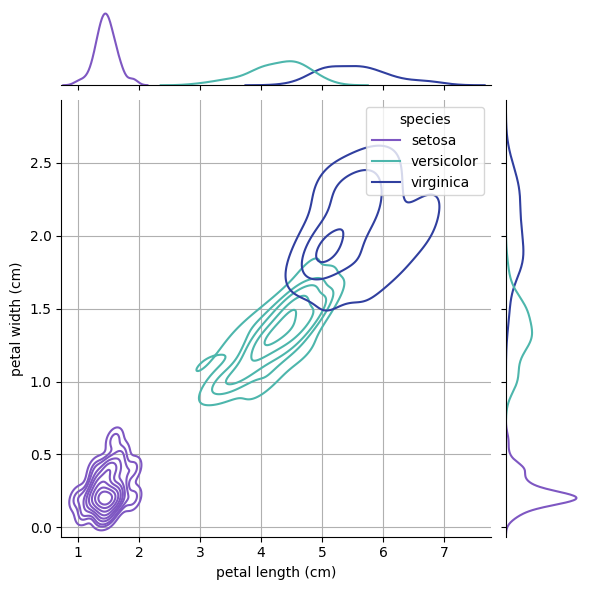

In [62]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", hue = 'species', data=df, kind="kde", palette=palette)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

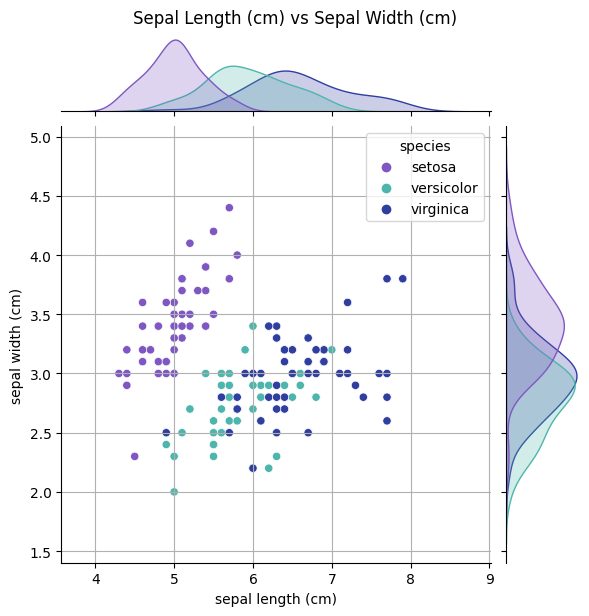

In [63]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Sepal Length (cm) vs Sepal Width (cm)', y=1.02)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

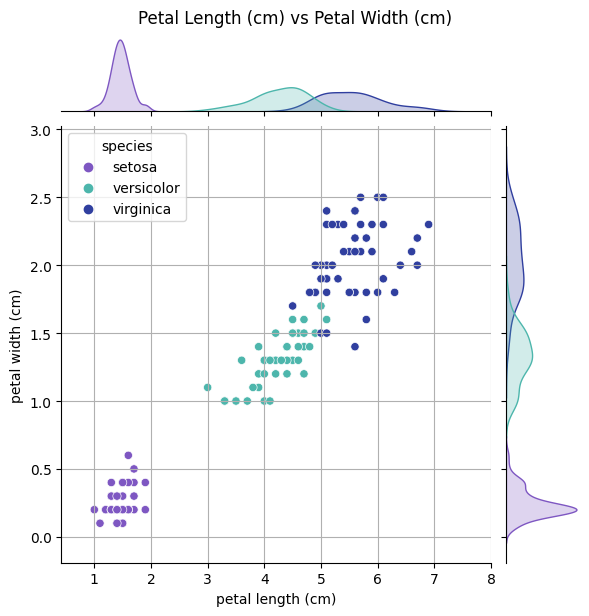

In [64]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Petal Length (cm) vs Petal Width (cm)', y=1.02)
plt.grid()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

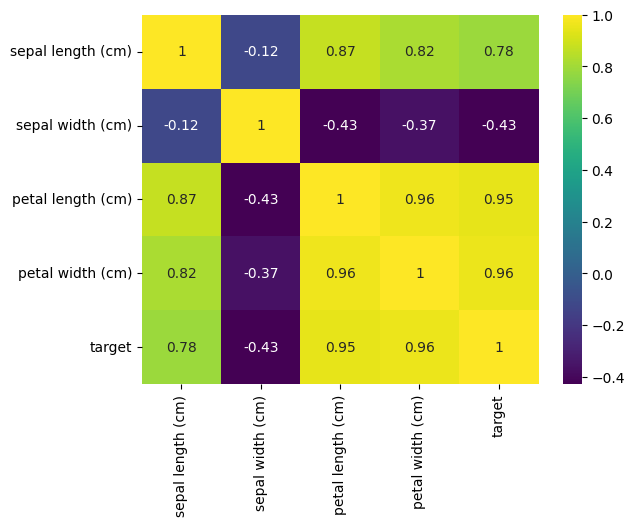

In [60]:
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()